# Veri Bilimi Ödevi

## Veri Seti Hikayesi

Veri seti Titanic'in batması sonucunda gemide bulunanların bilgilerini içermektedir.

* survived --> Hayatta kalma durumu ( 0 = Hayır, 1 = Evet )
* pclass --> Bilet sınıfı ( 1 = 1.sınıf, 2 = 2.sınıf, 3 = 3.sınıf )
* sex --> Cinsiyet
* age --> Yaş
* sibsp --> Titanicteki kardeş/eş sayısı
* parch --> Titanikteki ebeveyn/çocuk sayısı
* ticket --> Bilet numarası
* fare --> Yolcu ücreti
* cabin --> Kabin numarası
* embarked --> Biniş limanı ( C = Cherbourg, Q = Queenstown, S = Southampton )

Hedef değişken 'survived' olacaktır.

Araştırılan konu hayatta kalanların çoğunluğunun sosyoekonomik statüsüdür.

In [1]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.copy()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
# Gözlem sayısı

In [3]:
df.shape # 891 satır bulunmaktadır

(891, 15)

In [4]:
# Değişken bilgileri

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# Sayısal değişkenler için betimsel istatistikler

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
# Kategorik Değişkenler için; sınıf sayıları ve her bir sınıf frekansları 

In [9]:
# Kategorik değişkenler : sex, embarked, pclass, survived

In [10]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [11]:
# Titanik gemisinde 577 erkek, 314 kadın bulunmuş.

In [12]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [13]:
# Titanik gemisinde seyahat edenlerin 549'u ölmüş, 342'si hayatta kalmıştır.

In [14]:
df["pclass"].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [15]:
# Titanik gemisinde 1.sınıf bilet 216, 2.sınıf bilet 184 ve 3.sınıf bilet 491 kişi tarafından alınmıştır.

In [16]:
df["embarked"].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [17]:
# Titanik gemisindeki yolculardan S limanından 644, C limanından 168 ve Q limanından 77 yolcu binmiştir.

In [18]:
# Eksik Veri Mevcut mu ? Var ise değişken başına sayıları.

In [19]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [20]:
# 'age' değişkeninde 177, 'embarked' değişkeninde 2, 'embark_town' değişkeninde 2 ve
# 'deck' değişkeninde 688 adet eksik veri mevcuttur.

In [21]:
# En az 3 farklı yöntemle veri görselleştirme (çaprazlamalı yorumları da dahil) yapılmalıdır. 

### Barplot

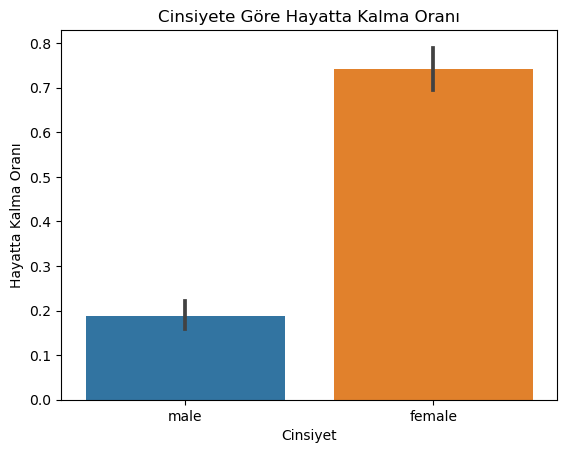

In [22]:
import matplotlib.pyplot as plt

sns.barplot(data=titanic, x="sex", y="survived")
plt.title("Cinsiyete Göre Hayatta Kalma Oranı")
plt.ylabel("Hayatta Kalma Oranı")
plt.xlabel("Cinsiyet")
plt.show()

In [23]:
# Grafik cinsiyete göre hayatta kalma oranını göstermektedir. Grafiğe göre kadınların hayatta kalma oranı
# erkeklerin hayatta kalma oranına göre çok daha yüksektir.

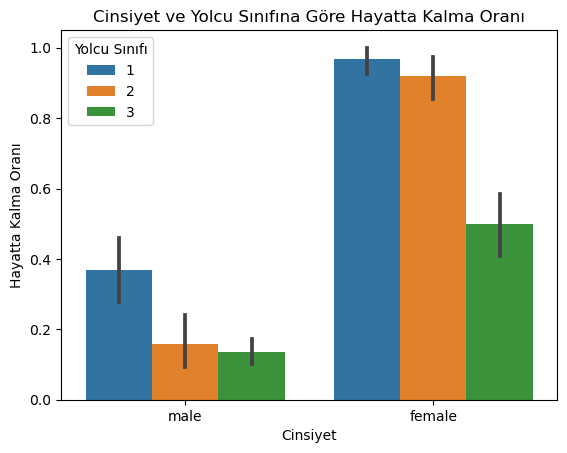

In [24]:
sns.barplot(data=titanic, x="sex", y="survived", hue="pclass")
plt.title("Cinsiyet ve Yolcu Sınıfına Göre Hayatta Kalma Oranı")
plt.ylabel("Hayatta Kalma Oranı")
plt.xlabel("Cinsiyet")
plt.legend(title="Yolcu Sınıfı")
plt.show()

In [25]:
# Grafik cinsiyet ve yolcu sınıfına göre hayatta kalma oranını göstermektedir.
# Grafiğin geneline bakılırsa erkekler kadınlara göre daha az hayatta kalma oranına sahip (yukarda da demiştik). 
# Özele inildiğinde yolcu sınıfı kalitesi arttığında ölüm oranı azalmıştır.

### Countplot

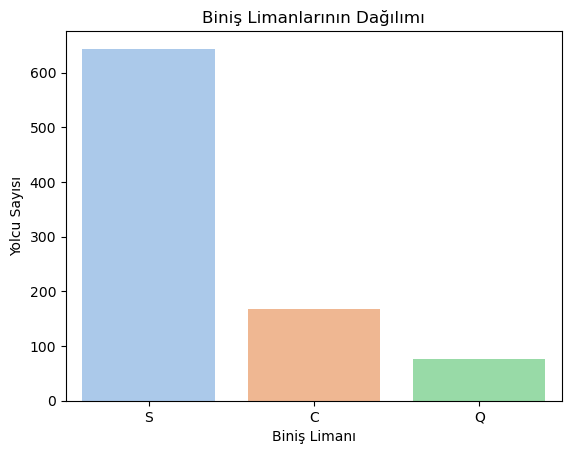

In [26]:
sns.countplot(data=titanic, x="embarked", palette="pastel")
plt.title("Biniş Limanlarının Dağılımı")
plt.ylabel("Yolcu Sayısı")
plt.xlabel("Biniş Limanı")
plt.show()

In [27]:
# Grafik yolcuların bindiği limanları göstermektedir. En çok S, sonra C ve en az da Q limanından yolcu alınmıştır.

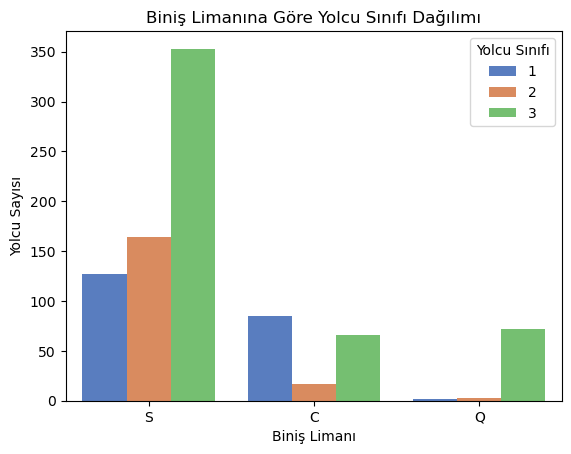

In [28]:
sns.countplot(data=titanic, x="embarked", hue="pclass", palette="muted")
plt.title("Biniş Limanına Göre Yolcu Sınıfı Dağılımı")
plt.ylabel("Yolcu Sayısı")
plt.xlabel("Biniş Limanı")
plt.legend(title="Yolcu Sınıfı")
plt.show()

In [29]:
# Grafik limanlara göre yolcu sınıf dağılımlarını göstermektedir. 

### Violin

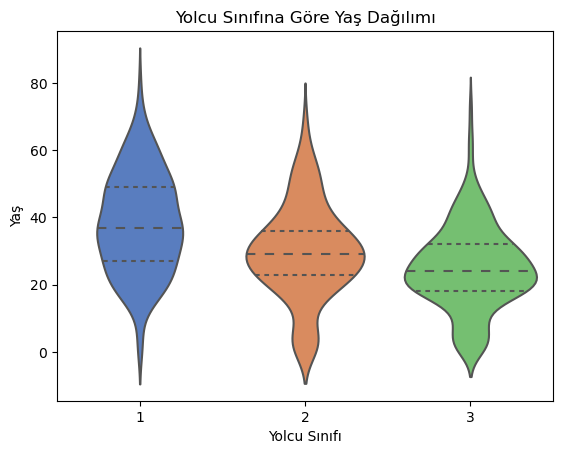

In [30]:
from matplotlib.patches import Patch

sns.violinplot(data=titanic, x="pclass", y="age", palette="muted", inner="quartile")
plt.title("Yolcu Sınıfına Göre Yaş Dağılımı")
plt.ylabel("Yaş")
plt.xlabel("Yolcu Sınıfı")
plt.show()

In [31]:
# Grafik yolcu sınıfına göre yaş dağılımını göstermektedir. 
# 1.sınıf yolcular ortalama 38-40 yaşlarında, 2.sınıf yolcular ortalama 30 yaşlarında ve 3.sınıf yolcular ortalama 24-25 yaşlarındadır.

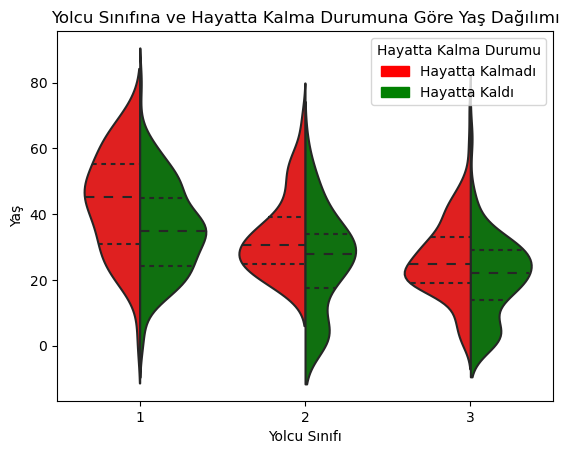

In [32]:
sns.violinplot(data=titanic, x="pclass", y="age", hue="survived", split=True, palette={0: "red", 1: "green"}, inner="quartile")
plt.title("Yolcu Sınıfına ve Hayatta Kalma Durumuna Göre Yaş Dağılımı")
plt.ylabel("Yaş")
plt.xlabel("Yolcu Sınıfı")

# Özel renkler ve açıklamalar yaptım.
legend_labels = [Patch(color="red", label="Hayatta Kalmadı"), 
                 Patch(color="green", label="Hayatta Kaldı")]

plt.legend(handles=legend_labels, title="Hayatta Kalma Durumu", loc="upper right")
plt.show()

In [33]:
# Grafik yolcu sınıfına ve hayatta kalma durumuna göre yaş dağılımını göstermektedir.
# 1. yolcu sınıfına ait hayatta kalamayan yolcu yaşı ortalama 43-44 yaşlarıyken, hayatta kalan yolcu yaşı ortalama 37-38 yaştır.
# 2. yolcu sınıfına ait hayatta kalamayan yolcu yaşı ortalama 30 yaşlarıyken, hayatta kalan yolcu yaşı ortalama 28-30 yaştır.
# 3. yolcu sınıfına ait hayatta kalamayan yolcu yaşı ortalama 25 yaşlarıyken, hayatta kalan yolcu yaşı ortalama 22-23 yaştır.

In [34]:
# Aykırı değer problemi çözümü

### Aykırı Değer Problemi - LOF

In [35]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

target_variable = 'survived'

# Eksik verileri içermeyen satırları veri setinden çıkarıyoruz
numerical_data = titanic.drop(columns=[target_variable]).select_dtypes(include=[np.number]).dropna()

# LOF modelini oluşturma ve LOF puanlarını hesaplama
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof.fit(numerical_data)

# LOF puanlarını hesaplıyoruz
lof_scores = lof.negative_outlier_factor_

# Aykırı değerlerin belirlenmesi için eşik değeri seçiyoruz
threshold = -1.5  # Eşik değer: Daha negatif olanlar aykırı kabul edilecek
outliers = lof_scores < threshold

# Eksik verilere sahip satırlar için 'NaN' değeri ekleyelim
outliers_full = np.full(titanic.shape[0], np.nan)
outliers_full[numerical_data.index] = outliers

# LOF sonuçlarını veri setine ekleyelim
titanic['lof_outlier'] = outliers_full

# Aykırı değerleri tüm sayısal sütunlarda median ile baskılama
for column in numerical_data.columns:
    titanic.loc[titanic['lof_outlier'] == True, column] = titanic[column].median()

# Geçici sütunu kaldıralım
titanic = titanic.drop(columns=['lof_outlier'])

# Aykırı değerlerin dağılımını yazdıralım
print("LOF Puanlarına Göre Aykırı Değerler Dağılımı:")
pd.Series(outliers).value_counts()

LOF Puanlarına Göre Aykırı Değerler Dağılımı:


False    691
True      23
dtype: int64

In [36]:
# False --> aykırı olmayan değerler, True --> aykırı olan değerler.

### Eksik Veri Problemi Çözümü

In [37]:
# eksik verileri doldurma veya silme aşaması

In [38]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [39]:
# önce sayısal değişkenimi ortalama değerle dolduruyorum.

In [40]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

In [41]:
# sonra kategorik değişkenlerimi mod değerimle dolduruyorum.

In [42]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

In [43]:
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

In [44]:
# %50'den fazla eksik verisi bulunan 'deck' sütununu kaldırıyorum.

In [45]:
titanic = titanic.drop(columns=['deck'])

In [46]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [47]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


### One-hot Dönüşümü (Dummy Tuzağına Dikkat edilerek)

In [48]:
# Kategorik değişkenlerinizin isimlerinin hepsini yazıyoruz
kategorik_deg = ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']

# One-Hot Encoding işlemi
titanic_donusturulmus = pd.get_dummies(titanic, columns=kategorik_deg, drop_first=True)
titanic_donusturulmus

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,adult_male_True,embark_town_Queenstown,embark_town_Southampton,alive_yes,alone_True
0,0,3,22.0,1,0,7.2500,1,0,1,0,1,1,0,1,0,1,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1,0,1,0,0,1,1,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,1,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1,1,0,1,0,1,0,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1,0,0,0,1,0,0,1,1,1
888,0,3,28.0,1,2,23.4500,0,0,1,0,1,0,1,0,0,1,0,0
889,1,1,26.0,0,0,30.0000,1,0,0,0,0,1,0,1,0,0,1,1


In [49]:
# oluşan son veri setini dosyaya kaydetme işlemi

In [50]:
# Veri setini bir CSV dosyasına kaydetme
titanic_donusturulmus.to_csv('titanic_donusturulmus.csv', index=False)

### Problem Türü Belirleme

In [51]:
# Hedef değişkenim 'survived' kategorik çıktı verdiğinden dolayı 'sınıflandırma' problem türüne sahibim.
# Burdan itibaren 'titanic_donusturulmus' değişkeni ile devam ediyoruz.

In [52]:
# Gerekli kütüphanelerin kurulması

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

In [54]:
# Özellikler ve etiketlerin ayrılması
X = titanic_donusturulmus.drop(columns=['survived'])
y = titanic_donusturulmus['survived']

# Veriyi eğitim ve test olarak bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### SVM Modeli

In [55]:
from sklearn.svm import SVC

# SVM modelini tanımlama
svm = SVC(random_state=42)

# Hiperparametrelerin ayarlanması için GridSearchCV
param_grid = {
    'C': [0.1, 1, 10], # cezalandırma derecesi
    'kernel': ['linear', 'rbf'], # karar sınırı
    'gamma': ['scale', 'auto'] # çekirdek fonksiyonlarının etkisi
}

In [56]:
from sklearn.model_selection import GridSearchCV

# K-kat çapraz doğrulama ve hiperparametre ayarlama
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve doğruluğu yazdırma
print(f"En iyi parametreler: {grid_search.best_params_}")
print(f"En iyi doğruluk: {grid_search.best_score_}")

En iyi parametreler: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
En iyi doğruluk: 1.0


In [57]:
# Test verisi üzerinde tahmin yapma
y_pred_svm = grid_search.best_estimator_.predict(X_test)

# Sonuçları değerlendirme
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       111

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

